4.004261756922342
0.22201196421659047
6.735371050504458
0.1382099125282979


Text(0.5, 1.0, "Wyliczona granica dla rozkładu Cauchy'ego")

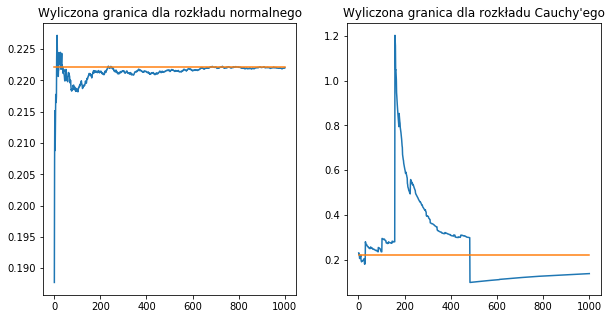

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy



# Rozkład ze skończonym pierwszym momentem: np. rozkład normalny
# Zakładamy, że średnia długość samochodu wynosi 4, a odchylenie standardowe 0.5

#print(normalne)

N = 1000
mi = 4
sigma = 0.5

# Rozkład z nieskończonym pierwszym momentem: np. rozkład Cauchiego
# Zakładamy, że średnia długość samochodu wynosi 4, a odchylenie standardowe 0.5

calcLim = 1/(mi+0.5)
#print(calcLim)

indeksy_lista = []
srednieL_N_lista = []
lim_N_lista = []
srednieL_C_lista = []
lim_C_lista = []

for k in range(1, N+1):
    indeksy_lista.append(k)
    L_N = np.random.normal(loc = mi, scale=sigma)
    L_C = cauchy.rvs(loc = mi, scale=sigma, size=1).item()
    #d = np.random.uniform(0, 1)
    if k==1:
        srednieL_N = L_N
        srednieL_C = L_C
    else:
        srednieL_N = np.average([srednieL_N, L_N], weights=[k, 1])
        srednieL_C = np.average([srednieL_C, L_C], weights=[k, 1])
    srednieL_N_lista.append(srednieL_N)
    srednieL_C_lista.append(srednieL_C)
    lim_N = 1/(srednieL_N+0.5)
    lim_C = 1/(srednieL_C+0.5)
    lim_N_lista.append(lim_N)
    lim_C_lista.append(lim_C)
    
print(srednieL_N)
print(lim_N)
print(srednieL_C)
print(lim_C)
    
fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(indeksy_lista, lim_N_lista, '-', indeksy_lista, [calcLim]*k, '-')
ax[0].set_title("Wyliczona granica dla rozkładu normalnego")
ax[1].plot(indeksy_lista, lim_C_lista, '-', indeksy_lista, [calcLim]*k, '-')
ax[1].set_title("Wyliczona granica dla rozkładu Cauchy'ego")